The notebook uses the code described in <br>
"**Моем датасет: руководство по очистке данных в Python**" by *furry.cat* <br>
https://proglib.io/p/moem-dataset-rukovodstvo-po-ochistke-dannyh-v-python-2020-03-27

# Importing libraries

In [1]:
import pandas as pd   # data analysis and manipulation tools
import numpy as np    # multi-dimensional arrays and matrices
import seaborn as sns # data visualization

# Importing the dataset

In [2]:
df = pd.read_csv('data/03-bank.csv')

# shape and data types of the data
print(df.shape)
print(df.describe())

(30471, 292)
                 id       full_sq       life_sq         floor     max_floor  \
count  30471.000000  30471.000000  24088.000000  30304.000000  20899.000000   
mean   15237.917397     54.214269     34.403271      7.670803     12.558974   
std     8796.501536     38.031487     52.285733      5.319989      6.756550   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%     7620.500000     38.000000     20.000000      3.000000      9.000000   
50%    15238.000000     49.000000     30.000000      6.500000     12.000000   
75%    22855.500000     63.000000     43.000000     11.000000     17.000000   
max    30473.000000   5326.000000   7478.000000     77.000000    117.000000   

           material    build_year      num_room      kitch_sq         state  \
count  20899.000000  1.686600e+04  20899.000000  20899.000000  16912.000000   
mean       1.827121  3.068057e+03      1.909804      6.399301      2.107025   
std        1.481154  1.543878e+05     

# Missing data

### Missing values detection

In [3]:
# Percentage list for missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    
    if pct_missing>0.2: # show the features with more than 20% missing values
        print('{} - {}%'.format(col, round(pct_missing*100)))

life_sq - 21%
max_floor - 31%
material - 31%
build_year - 45%
num_room - 31%
kitch_sq - 31%
state - 44%
preschool_quota - 22%
school_quota - 22%
hospital_beds_raion - 47%
cafe_sum_500_min_price_avg - 44%
cafe_sum_500_max_price_avg - 44%
cafe_avg_price_500 - 44%
cafe_sum_1000_min_price_avg - 21%
cafe_sum_1000_max_price_avg - 21%
cafe_avg_price_1000 - 21%


<AxesSubplot:xlabel='index'>

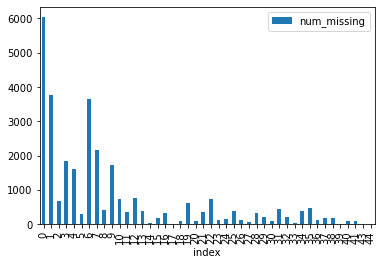

In [4]:
# Add the indicator of missing values
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        # create the missing value indicator variables 
        df['{}_ismissing'.format(col)] = missing

# Build histogramm
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by=
                            'index').plot.bar(x='index', y='num_missing')

<AxesSubplot:>

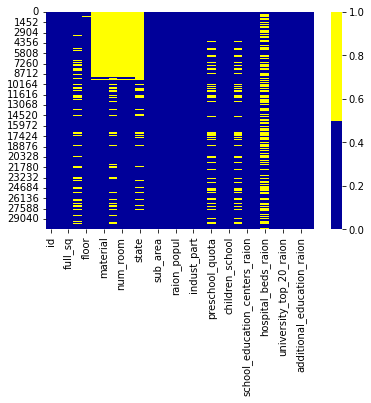

In [5]:
cols = df.columns[:30] # cut the first 30 columns

# Define the color: yellow reflects the missing data, blue reflects complete data 
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

## Dealing with missing data

In [6]:
# Drop the rows with many missing values

ind_missing = df[df['num_missing'] > 35].index
df_less_missing_rows = df.drop(ind_missing, axis=0)

print(df_less_missing_rows.shape)

(29779, 344)


In [7]:
# Drop the feature 'hospital_beds_raion' (47% of missing values)

df_less_hos_beds_raion = df.drop('hospital_beds_raion', axis=1)

print(df_less_hos_beds_raion.shape)

(30471, 343)


In [8]:
# Imput the missig values with mediana

med = df['life_sq'].median()
print(med)

df['life_sq'] = df['life_sq'].fillna(med)
print(df.shape)

30.0
(30471, 344)


In [9]:
# Impute the missing values for each numeric column.
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    # only do the imputation for the columns that have missing values
    if num_missing > 0:  
        # print('imputing missing values for: {}'.format(col))
        med = df[col].median()
        df[col] = df[col].fillna(med)
        
print(df.shape)

(30471, 344)


In [10]:
# Replace the missing data

# categorical feature
df['sub_area'] = df['sub_area'].fillna('_MISSING_')

# numerical feature
df['life_sq'] = df['life_sq'].fillna(-999)

# Outliers

## Outliers detection

<AxesSubplot:>

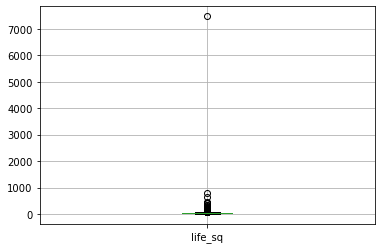

In [11]:
# Boxplot

df.boxplot(column=['life_sq'])

In [12]:
# Descriptive statistics

df['life_sq'].describe()

count    30471.000000
mean        33.480883
std         46.522251
min          0.000000
25%         22.000000
50%         30.000000
75%         38.000000
max       7478.000000
Name: life_sq, dtype: float64

## Dealing with outlers
See techniques for dealing with missing values

# Irrelevant data
If the feature contents of many rows with the same data, it does not provide helpful information

## Irrelevant data detection

In [13]:
num_rows = len(df.index)
low_information_cols = [] 

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.3f}%'.format(col, top_pct*100))
        print(cnts)
        print()

oil_chemistry_raion: 99.029%
no     30175
yes      296
Name: oil_chemistry_raion, dtype: int64

railroad_terminal_raion: 96.272%
no     29335
yes     1136
Name: railroad_terminal_raion, dtype: int64

nuclear_reactor_raion: 97.168%
no     29608
yes      863
Name: nuclear_reactor_raion, dtype: int64

build_count_foam: 95.356%
0.0     29056
1.0       969
11.0      262
2.0       184
Name: build_count_foam, dtype: int64

big_road1_1line: 97.437%
no     29690
yes      781
Name: big_road1_1line, dtype: int64

railroad_1line: 97.069%
no     29578
yes      893
Name: railroad_1line, dtype: int64

cafe_count_500_price_high: 97.256%
0    29635
1      787
2       38
3       11
Name: cafe_count_500_price_high, dtype: int64

mosque_count_500: 99.511%
0    30322
1      149
Name: mosque_count_500, dtype: int64

cafe_count_1000_price_high: 95.527%
0    29108
1     1104
2      145
3       51
4       39
5       15
6        8
7        1
Name: cafe_count_1000_price_high, dtype: int64

mosque_count_1000: 98.

## Dealing with irrelevant data

In [14]:
df.drop(['metro_km_walk_ismissing'], axis=1)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_sum_2000_max_price_avg_ismissing,cafe_avg_price_2000_ismissing,cafe_sum_3000_min_price_avg_ismissing,cafe_sum_3000_max_price_avg_ismissing,cafe_avg_price_3000_ismissing,prom_part_5000_ismissing,cafe_sum_5000_min_price_avg_ismissing,cafe_sum_5000_max_price_avg_ismissing,cafe_avg_price_5000_ismissing,num_missing
0,1,2011-08-20,43,27.0,4.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,False,9
1,2,2011-08-23,34,19.0,3.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,False,6
2,3,2011-08-27,43,29.0,2.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,False,6
3,4,2011-09-01,89,50.0,9.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,False,7
4,5,2011-09-05,77,77.0,4.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,False,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,False,False,False,False,False,False,False,False,False,1
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,False,False,False,False,False,False,False,False,False,0
30468,30471,2015-06-30,45,30.0,10.0,20.0,1.0,1979.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,21
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,False,False,False,False,False,False,False,False,False,0


# Duplicated records

## Duplicated records detection

In [15]:
# drop not-unique rows
df_dedupped = df.drop('id', axis=1).drop_duplicates()

# compare the dataframe dimentions
print(df.shape)
print(df_dedupped.shape)

(30471, 344)
(30461, 343)


## Dealing with duplicated data

In [16]:
key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 
       'num_room', 'price_doc']
df_dedupped2 = df.drop_duplicates(subset=key)

print(df.shape)
print(df_dedupped2.shape)

(30471, 344)
(30455, 344)


In [17]:
# Data duplicated on key features

key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 
       'num_room', 'price_doc']

df.fillna(-999).groupby(key)['id'].count().sort_values(ascending=False).head(20)

timestamp   full_sq  life_sq  floor  build_year  num_room  price_doc
2013-12-18  39       30.0     6.0    1979.0      1.0       3700946      2
2015-03-30  41       41.0     11.0   2016.0      1.0       4114580      2
2015-03-14  62       30.0     2.0    1979.0      2.0       6520500      2
2013-12-05  40       30.0     5.0    1979.0      1.0       4414080      2
2013-06-24  40       30.0     12.0   1979.0      2.0       4112800      2
2013-08-30  40       30.0     12.0   1979.0      1.0       4462000      2
2014-12-09  40       30.0     17.0   1979.0      1.0       4607265      2
2012-08-27  59       30.0     6.0    1979.0      2.0       4506800      2
2014-04-15  134      134.0    1.0    0.0         3.0       5798496      2
2013-09-23  85       30.0     14.0   1979.0      3.0       7725974      2
2014-01-22  46       28.0     1.0    1968.0      2.0       3000000      2
2014-12-17  62       30.0     9.0    1979.0      2.0       6552000      2
2012-10-22  61       30.0     18.0   1979.0

## Data entry errors
<i>For categorical data</i>

In [18]:
# Typos detection
from nltk.metrics import edit_distance

# Prepare artificial dataset
df_city_ex = pd.DataFrame(data={'city': ['torontoo', 'toronto', 'tronto', 'vancouver', 
                                         'vancover', 'vancouvr', 'montreal', 'calgary']})

df_city_ex['city_distance_toronto'] = df_city_ex['city'].map(lambda x: 
                                                        edit_distance(x, 'toronto'))
df_city_ex['city_distance_vancouver'] = df_city_ex['city'].map(lambda x: 
                                                        edit_distance(x, 'vancouver'))
df_city_ex

,city,city_distance_toronto,city_distance_vancouver
0,torontoo,1,8
1,toronto,0,8
2,tronto,1,8
3,vancouver,8,0
4,vancover,7,1
5,vancouvr,7,1
6,montreal,7,8
7,calgary,7,8


In [19]:
# Dealing with typos
msk = df_city_ex['city_distance_toronto'] <= 2
df_city_ex.loc[msk, 'city'] = 'toronto'

msk = df_city_ex['city_distance_vancouver'] <= 2
df_city_ex.loc[msk, 'city'] = 'vancouver'

df_city_ex

,city,city_distance_toronto,city_distance_vancouver
0,toronto,1,8
1,toronto,0,8
2,toronto,1,8
3,vancouver,8,0
4,vancouver,7,1
5,vancouver,7,1
6,montreal,7,8
7,calgary,7,8
